# Labeled Faces in the Wild 

## Imports

In [1]:
import sys 
import os
import numpy as np 
import matplotlib.pyplot as plt
from skimage import io


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataset import Dataset

sys.path.insert(0, '../src_code')

import models

from utils import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 8
lr = 0.001
k = 3


## Load Labeled Faces in the Wild 
### http://vis-www.cs.umass.edu/lfw/

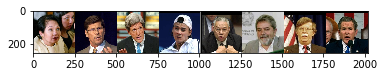

In [3]:
data_dir = "../datasets/lfw/lfw_15/"

img_paths = []
for p in os.listdir(data_dir): 
    for i in os.listdir(os.path.join(data_dir,p)): 
        img_paths.append(os.path.join(data_dir,p,i))
        
people = []
people_to_idx = {}
k = 0 
for i in img_paths: 
    name = i.split('/')[-2]
    if name not in people_to_idx: 
        people.append(name)
        people_to_idx[name] = k
        k += 1


img_paths = np.random.permutation(img_paths)

lfw_size = len(img_paths)

lfw_train_size = int(0.8 * lfw_size)

lfw_train_list = img_paths[:lfw_train_size]
lfw_test_list = img_paths[lfw_train_size:]

class LFWDataset(Dataset): 
    def __init__(self, file_list, class_to_label, transform=None): 
        self.file_list = file_list
        self.transform = transform
        
        self.people_to_idx = class_to_label
        
                
    def __len__(self): 
        return len(self.file_list)
    def __getitem__(self, idx): 
        img_path = self.file_list[idx]
        image = io.imread(img_path)
        label = self.people_to_idx[img_path.split('/')[-2]]
        
        if self.transform is not None: 
            image = self.transform(image)
        
        return image, label
        

# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    

trainset = LFWDataset(lfw_train_list, people_to_idx, transform=train_transform)
testset = LFWDataset(lfw_test_list, people_to_idx, transform=test_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Train Model 

In [4]:
net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=32, size=250).to(device)

net.apply(models.weights_init)

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [ ]:
train(net, trainloader, testloader, optimizer, loss, n_epochs, verbose=True)

[0/50][0/360] loss = 6.376895
[0/50][1/360] loss = 111.279037
[0/50][2/360] loss = 280.167572
[0/50][3/360] loss = 222.567734
[0/50][4/360] loss = 184.259659
[0/50][5/360] loss = 130.831924
[0/50][6/360] loss = 243.397171
[0/50][7/360] loss = 237.019287
[0/50][8/360] loss = 189.160004
[0/50][9/360] loss = 172.700043
[0/50][10/360] loss = 214.860260
[0/50][11/360] loss = 150.821777
[0/50][12/360] loss = 93.431198
[0/50][13/360] loss = 168.881210
[0/50][14/360] loss = 166.652039
[0/50][15/360] loss = 111.362755
[0/50][16/360] loss = 130.906570
[0/50][17/360] loss = 92.457184
[0/50][18/360] loss = 124.371887
[0/50][19/360] loss = 255.575699
[0/50][20/360] loss = 230.997314
[0/50][21/360] loss = 159.345978
[0/50][22/360] loss = 143.118317
[0/50][23/360] loss = 199.376160
[0/50][24/360] loss = 165.857147
[0/50][25/360] loss = 159.458313
[0/50][26/360] loss = 142.854385
[0/50][27/360] loss = 150.910599
[0/50][28/360] loss = 122.011185
[0/50][29/360] loss = 108.768066
[0/50][30/360] loss = 12

[0/50][254/360] loss = 49.216103
[0/50][255/360] loss = 33.491592
[0/50][256/360] loss = 42.863247
[0/50][257/360] loss = 23.568178
[0/50][258/360] loss = 39.360802
[0/50][259/360] loss = 38.675606
[0/50][260/360] loss = 33.704666
[0/50][261/360] loss = 19.164009
[0/50][262/360] loss = 43.808353
[0/50][263/360] loss = 50.674526
[0/50][264/360] loss = 35.697338
[0/50][265/360] loss = 49.087868
[0/50][266/360] loss = 44.034641
[0/50][267/360] loss = 37.242897
[0/50][268/360] loss = 34.672092
[0/50][269/360] loss = 24.006502
[0/50][270/360] loss = 46.927631
[0/50][271/360] loss = 29.335653
[0/50][272/360] loss = 51.618408
[0/50][273/360] loss = 28.592333
[0/50][274/360] loss = 38.580715
[0/50][275/360] loss = 31.379757
[0/50][276/360] loss = 20.207760
[0/50][277/360] loss = 35.355293
[0/50][278/360] loss = 31.650124
[0/50][279/360] loss = 37.278599
[0/50][280/360] loss = 39.086845
[0/50][281/360] loss = 30.851124
[0/50][282/360] loss = 31.535141
[0/50][283/360] loss = 23.000452
[0/50][284

[1/50][151/360] loss = 11.293200
[1/50][152/360] loss = 7.934235
[1/50][153/360] loss = 5.069407
[1/50][154/360] loss = 9.732081
[1/50][155/360] loss = 8.631432
[1/50][156/360] loss = 5.665560
[1/50][157/360] loss = 6.155485
[1/50][158/360] loss = 8.472656
[1/50][159/360] loss = 6.404125
[1/50][160/360] loss = 10.167184
[1/50][161/360] loss = 7.420922
[1/50][162/360] loss = 10.724794
[1/50][163/360] loss = 3.269737
[1/50][164/360] loss = 8.995337
[1/50][165/360] loss = 11.549700
[1/50][166/360] loss = 9.628241
[1/50][167/360] loss = 10.360404
[1/50][168/360] loss = 6.312553
[1/50][169/360] loss = 4.519330
[1/50][170/360] loss = 7.026756
[1/50][171/360] loss = 10.152935
[1/50][172/360] loss = 8.284840
[1/50][173/360] loss = 3.515804
[1/50][174/360] loss = 6.407939
[1/50][175/360] loss = 9.636478
[1/50][176/360] loss = 3.190601
[1/50][177/360] loss = 5.869800
[1/50][178/360] loss = 5.751507
[1/50][179/360] loss = 7.912284
[1/50][180/360] loss = 11.117846
[1/50][181/360] loss = 2.439573
[

[2/50][54/360] loss = 0.494812
[2/50][55/360] loss = 1.514898
[2/50][56/360] loss = 2.544274
[2/50][57/360] loss = 1.999817
[2/50][58/360] loss = 0.555952
[2/50][59/360] loss = 2.218750
[2/50][60/360] loss = 1.690725
[2/50][61/360] loss = 1.758855
[2/50][62/360] loss = 1.586128
[2/50][63/360] loss = 1.236319
[2/50][64/360] loss = 2.851508
[2/50][65/360] loss = 0.414659
[2/50][66/360] loss = 2.379495
[2/50][67/360] loss = 1.390770
[2/50][68/360] loss = 3.064974
[2/50][69/360] loss = 1.383826
[2/50][70/360] loss = 2.790391
[2/50][71/360] loss = 1.418957
[2/50][72/360] loss = 2.953669
[2/50][73/360] loss = 4.182037
[2/50][74/360] loss = 2.286821
[2/50][75/360] loss = 0.659486
[2/50][76/360] loss = 2.614428
[2/50][77/360] loss = 1.474314
[2/50][78/360] loss = 3.219916
[2/50][79/360] loss = 2.138217
[2/50][80/360] loss = 2.550226
[2/50][81/360] loss = 1.500308
[2/50][82/360] loss = 2.694185
[2/50][83/360] loss = 1.370209
[2/50][84/360] loss = 2.353489
[2/50][85/360] loss = 1.105563
[2/50][8

[2/50][316/360] loss = 0.870163
[2/50][317/360] loss = 2.162632
[2/50][318/360] loss = 1.334851
[2/50][319/360] loss = 0.673728
[2/50][320/360] loss = 0.698431
[2/50][321/360] loss = 0.789153
[2/50][322/360] loss = 1.967137
[2/50][323/360] loss = 2.245632
[2/50][324/360] loss = 1.800602
[2/50][325/360] loss = 2.148219
[2/50][326/360] loss = 0.992466
[2/50][327/360] loss = 1.939070
[2/50][328/360] loss = 3.596436
[2/50][329/360] loss = 2.241693
[2/50][330/360] loss = 0.526903
[2/50][331/360] loss = 0.934347
[2/50][332/360] loss = 0.291052
[2/50][333/360] loss = 1.000562
[2/50][334/360] loss = 0.260975
[2/50][335/360] loss = 4.216072
[2/50][336/360] loss = 3.032878
[2/50][337/360] loss = 2.362138
[2/50][338/360] loss = 1.052988
[2/50][339/360] loss = 0.179093
[2/50][340/360] loss = 1.198454
[2/50][341/360] loss = 3.886767
[2/50][342/360] loss = 1.603491
[2/50][343/360] loss = 2.637800
[2/50][344/360] loss = 1.297527
[2/50][345/360] loss = 1.188629
[2/50][346/360] loss = 0.730270
[2/50][3

[3/50][217/360] loss = 0.130785
[3/50][218/360] loss = 0.516438
[3/50][219/360] loss = 0.398147
[3/50][220/360] loss = 1.350170
[3/50][221/360] loss = 2.314178
[3/50][222/360] loss = 0.064512
[3/50][223/360] loss = 0.671364
[3/50][224/360] loss = 0.600571
[3/50][225/360] loss = 0.399841
[3/50][226/360] loss = 1.279497
[3/50][227/360] loss = 1.287648
[3/50][228/360] loss = 1.134397
[3/50][229/360] loss = 0.348775
[3/50][230/360] loss = 1.003220
[3/50][231/360] loss = 0.913257
[3/50][232/360] loss = 2.672748
[3/50][233/360] loss = 1.883743
[3/50][234/360] loss = 0.045535
[3/50][235/360] loss = 1.246979
[3/50][236/360] loss = 0.562265
[3/50][237/360] loss = 1.208833
[3/50][238/360] loss = 0.372244
[3/50][239/360] loss = 1.735227
[3/50][240/360] loss = 1.864775
[3/50][241/360] loss = 1.643112
[3/50][242/360] loss = 0.435207
[3/50][243/360] loss = 0.846621
[3/50][244/360] loss = 2.082844
[3/50][245/360] loss = 0.338218
[3/50][246/360] loss = 0.571660
[3/50][247/360] loss = 1.526660
[3/50][2

[4/50][116/360] loss = 0.066026
[4/50][117/360] loss = 0.811088
[4/50][118/360] loss = 0.118571
[4/50][119/360] loss = 0.049421
[4/50][120/360] loss = 0.569628
[4/50][121/360] loss = 0.353859
[4/50][122/360] loss = 0.186866
[4/50][123/360] loss = 0.030803
[4/50][124/360] loss = 0.115082
[4/50][125/360] loss = 0.030993
[4/50][126/360] loss = 0.314062
[4/50][127/360] loss = 0.069754
[4/50][128/360] loss = 0.036190
[4/50][129/360] loss = 0.279108
[4/50][130/360] loss = 0.381636
[4/50][131/360] loss = 0.383556
[4/50][132/360] loss = 0.223615
[4/50][133/360] loss = 1.037040
[4/50][134/360] loss = 0.537787
[4/50][135/360] loss = 0.468233
[4/50][136/360] loss = 0.056594
[4/50][137/360] loss = 0.278929
[4/50][138/360] loss = 0.036605
[4/50][139/360] loss = 1.030475
[4/50][140/360] loss = 0.291308
[4/50][141/360] loss = 0.232680
[4/50][142/360] loss = 0.664505
[4/50][143/360] loss = 0.220717
[4/50][144/360] loss = 0.175570
[4/50][145/360] loss = 0.021754
[4/50][146/360] loss = 0.188559
[4/50][1

[5/50][17/360] loss = 0.776487
[5/50][18/360] loss = 0.286126
[5/50][19/360] loss = 0.456775
[5/50][20/360] loss = 0.799501
[5/50][21/360] loss = 0.152921
[5/50][22/360] loss = 0.301872
[5/50][23/360] loss = 0.207692
[5/50][24/360] loss = 0.015134
[5/50][25/360] loss = 0.001690
[5/50][26/360] loss = 0.233533
[5/50][27/360] loss = 0.135578
[5/50][28/360] loss = 0.794293
[5/50][29/360] loss = 0.303390
[5/50][30/360] loss = 0.018101
[5/50][31/360] loss = 0.193390
[5/50][32/360] loss = 0.102609
[5/50][33/360] loss = 0.188641
[5/50][34/360] loss = 0.017145
[5/50][35/360] loss = 0.010865
[5/50][36/360] loss = 0.094201
[5/50][37/360] loss = 0.324217
[5/50][38/360] loss = 0.124312
[5/50][39/360] loss = 0.744432
[5/50][40/360] loss = 0.120026
[5/50][41/360] loss = 0.683177
[5/50][42/360] loss = 0.151581
[5/50][43/360] loss = 0.093669
[5/50][44/360] loss = 0.275835
[5/50][45/360] loss = 0.511605
[5/50][46/360] loss = 0.188325
[5/50][47/360] loss = 0.695872
[5/50][48/360] loss = 0.023009
[5/50][4

[5/50][279/360] loss = 0.136056
[5/50][280/360] loss = 0.285604
[5/50][281/360] loss = 0.303679
[5/50][282/360] loss = 0.525921
[5/50][283/360] loss = 0.378420
[5/50][284/360] loss = 0.132268
[5/50][285/360] loss = 0.092286
[5/50][286/360] loss = 1.274585
[5/50][287/360] loss = 0.190789
[5/50][288/360] loss = 0.375259
[5/50][289/360] loss = 0.039445
[5/50][290/360] loss = 0.268179
[5/50][291/360] loss = 1.875470
[5/50][292/360] loss = 0.034135
[5/50][293/360] loss = 0.644913
[5/50][294/360] loss = 0.087469
[5/50][295/360] loss = 0.059163
[5/50][296/360] loss = 0.159291
[5/50][297/360] loss = 0.164940
[5/50][298/360] loss = 0.464426
[5/50][299/360] loss = 0.087955
[5/50][300/360] loss = 1.133069
[5/50][301/360] loss = 0.052625
[5/50][302/360] loss = 0.055043
[5/50][303/360] loss = 0.859192
[5/50][304/360] loss = 0.112977
[5/50][305/360] loss = 0.999783
[5/50][306/360] loss = 1.079853
[5/50][307/360] loss = 0.542080
[5/50][308/360] loss = 0.271607
[5/50][309/360] loss = 0.037322
[5/50][3

[6/50][185/360] loss = 0.020268
[6/50][186/360] loss = 0.024691
[6/50][187/360] loss = 0.027022
[6/50][188/360] loss = 0.118453
[6/50][189/360] loss = 0.102251
[6/50][190/360] loss = 1.395104
[6/50][191/360] loss = 0.759234
[6/50][192/360] loss = 0.251725
[6/50][193/360] loss = 0.543038
[6/50][194/360] loss = 0.013170
[6/50][195/360] loss = 0.020810
[6/50][196/360] loss = 0.556994
[6/50][197/360] loss = 0.493668
[6/50][198/360] loss = 0.127509
[6/50][199/360] loss = 0.567649
[6/50][200/360] loss = 0.058666
[6/50][201/360] loss = 0.731095
[6/50][202/360] loss = 0.019355
[6/50][203/360] loss = 0.055663
[6/50][204/360] loss = 0.429288
[6/50][205/360] loss = 0.005888
[6/50][206/360] loss = 0.001254
[6/50][207/360] loss = 0.259310
[6/50][208/360] loss = 0.252594
[6/50][209/360] loss = 0.336604
[6/50][210/360] loss = 1.258275
[6/50][211/360] loss = 0.276119
[6/50][212/360] loss = 0.336323
[6/50][213/360] loss = 0.074388
[6/50][214/360] loss = 0.982700
[6/50][215/360] loss = 0.020183
[6/50][2

[7/50][89/360] loss = 0.110196
[7/50][90/360] loss = 0.860912
[7/50][91/360] loss = 1.410146
[7/50][92/360] loss = 0.473731
[7/50][93/360] loss = 0.063657
[7/50][94/360] loss = 0.233458
[7/50][95/360] loss = 0.027236
[7/50][96/360] loss = 0.016593
[7/50][97/360] loss = 0.061814
[7/50][98/360] loss = 0.002824
[7/50][99/360] loss = 0.013553
[7/50][100/360] loss = 0.642188
[7/50][101/360] loss = 0.139309
[7/50][102/360] loss = 0.067970
[7/50][103/360] loss = 0.057713
[7/50][104/360] loss = 0.604936
[7/50][105/360] loss = 0.416117
[7/50][106/360] loss = 0.360742
[7/50][107/360] loss = 0.034652
[7/50][108/360] loss = 0.007005
[7/50][109/360] loss = 0.111879
[7/50][110/360] loss = 0.053332
[7/50][111/360] loss = 0.045705
[7/50][112/360] loss = 0.009780
[7/50][113/360] loss = 0.448729
[7/50][114/360] loss = 0.006045
[7/50][115/360] loss = 0.222074
[7/50][116/360] loss = 0.710824
[7/50][117/360] loss = 1.855670
[7/50][118/360] loss = 0.190587
[7/50][119/360] loss = 0.025190
[7/50][120/360] los

[7/50][350/360] loss = 2.647292
[7/50][351/360] loss = 1.477703
[7/50][352/360] loss = 0.120248
[7/50][353/360] loss = 0.059647
[7/50][354/360] loss = 0.090192
[7/50][355/360] loss = 0.863019
[7/50][356/360] loss = 0.631374
[7/50][357/360] loss = 0.087040
[7/50][358/360] loss = 0.069186
[7/50][359/360] loss = 0.374548
[7/50]

Total accuracy = 25.59 %


[8/50][0/360] loss = 0.780980
[8/50][1/360] loss = 0.081222
[8/50][2/360] loss = 0.107539
[8/50][3/360] loss = 0.269537
[8/50][4/360] loss = 0.388174
[8/50][5/360] loss = 0.017446
[8/50][6/360] loss = 0.037572
[8/50][7/360] loss = 0.013032
[8/50][8/360] loss = 0.057030
[8/50][9/360] loss = 0.028017
[8/50][10/360] loss = 0.002646
[8/50][11/360] loss = 0.844540
[8/50][12/360] loss = 0.453769
[8/50][13/360] loss = 0.001578
[8/50][14/360] loss = 0.141693
[8/50][15/360] loss = 0.050547
[8/50][16/360] loss = 0.000103
[8/50][17/360] loss = 0.136140
[8/50][18/360] loss = 0.030207
[8/50][19/360] loss = 0.018024
[8/50][20/360] loss = 0.043752
[8/5

[8/50][252/360] loss = 0.004422
[8/50][253/360] loss = 0.290383
[8/50][254/360] loss = 0.641048
[8/50][255/360] loss = 0.007964
[8/50][256/360] loss = 0.003966
[8/50][257/360] loss = 0.004166
[8/50][258/360] loss = 0.010248
[8/50][259/360] loss = 0.102797
[8/50][260/360] loss = 0.007675
[8/50][261/360] loss = 0.019782
[8/50][262/360] loss = 0.502462
[8/50][263/360] loss = 0.340997
[8/50][264/360] loss = 0.001396
[8/50][265/360] loss = 0.120825
[8/50][266/360] loss = 0.002184
[8/50][267/360] loss = 0.027815
[8/50][268/360] loss = 0.052505
[8/50][269/360] loss = 0.369186
[8/50][270/360] loss = 0.325178
[8/50][271/360] loss = 0.078697
[8/50][272/360] loss = 0.018431
[8/50][273/360] loss = 0.209948
[8/50][274/360] loss = 0.188927
[8/50][275/360] loss = 0.117482
[8/50][276/360] loss = 0.013966
[8/50][277/360] loss = 0.038227
[8/50][278/360] loss = 0.000643
[8/50][279/360] loss = 0.005329
[8/50][280/360] loss = 0.000870
[8/50][281/360] loss = 0.078480
[8/50][282/360] loss = 0.357803
[8/50][2

[9/50][153/360] loss = 0.000538
[9/50][154/360] loss = 0.000184
[9/50][155/360] loss = 0.000601
[9/50][156/360] loss = 0.001076
[9/50][157/360] loss = 0.000214
[9/50][158/360] loss = 0.020790
[9/50][159/360] loss = 0.005971
[9/50][160/360] loss = 0.034637
[9/50][161/360] loss = 0.004293
[9/50][162/360] loss = 0.067944
[9/50][163/360] loss = 0.168551
[9/50][164/360] loss = 0.141135
[9/50][165/360] loss = 0.171974
[9/50][166/360] loss = 0.024348
[9/50][167/360] loss = 0.098074
[9/50][168/360] loss = 0.550035
[9/50][169/360] loss = 0.179518
[9/50][170/360] loss = 0.011399
[9/50][171/360] loss = 0.215009
[9/50][172/360] loss = 0.000127
[9/50][173/360] loss = 0.243428
[9/50][174/360] loss = 0.143442
[9/50][175/360] loss = 0.009879
[9/50][176/360] loss = 0.761430
[9/50][177/360] loss = 0.010472
[9/50][178/360] loss = 0.116230
[9/50][179/360] loss = 0.004709
[9/50][180/360] loss = 0.006198
[9/50][181/360] loss = 0.103874
[9/50][182/360] loss = 0.002131
[9/50][183/360] loss = 0.422898
[9/50][1

[10/50][50/360] loss = 0.018326
[10/50][51/360] loss = 0.000191
[10/50][52/360] loss = 1.037998
[10/50][53/360] loss = 0.203385
[10/50][54/360] loss = 0.238309
[10/50][55/360] loss = 0.001583
[10/50][56/360] loss = 0.894387
[10/50][57/360] loss = 0.000020
[10/50][58/360] loss = 0.006539
[10/50][59/360] loss = 0.290055
[10/50][60/360] loss = 0.015601
[10/50][61/360] loss = 0.050528
[10/50][62/360] loss = 0.000067
[10/50][63/360] loss = 0.000165
[10/50][64/360] loss = 0.011588
[10/50][65/360] loss = 0.013810
[10/50][66/360] loss = 0.032674
[10/50][67/360] loss = 0.001382
[10/50][68/360] loss = 0.059580
[10/50][69/360] loss = 0.051139
[10/50][70/360] loss = 0.398954
[10/50][71/360] loss = 0.058937
[10/50][72/360] loss = 0.038954
[10/50][73/360] loss = 0.010142
[10/50][74/360] loss = 0.033036
[10/50][75/360] loss = 0.057302
[10/50][76/360] loss = 0.020691
[10/50][77/360] loss = 0.003713
[10/50][78/360] loss = 1.396060
[10/50][79/360] loss = 0.312926
[10/50][80/360] loss = 0.233064
[10/50][

[10/50][302/360] loss = 0.183564
[10/50][303/360] loss = 0.029387
[10/50][304/360] loss = 0.265748
[10/50][305/360] loss = 0.025059
[10/50][306/360] loss = 0.880463
[10/50][307/360] loss = 0.154598
[10/50][308/360] loss = 0.000612
[10/50][309/360] loss = 0.100819
[10/50][310/360] loss = 0.000529
[10/50][311/360] loss = 0.139234
[10/50][312/360] loss = 0.526350
[10/50][313/360] loss = 0.010139
[10/50][314/360] loss = 0.015476
[10/50][315/360] loss = 0.005756
[10/50][316/360] loss = 0.530056
[10/50][317/360] loss = 0.031985
[10/50][318/360] loss = 0.271022
[10/50][319/360] loss = 0.001528
[10/50][320/360] loss = 0.018867
[10/50][321/360] loss = 0.434448
[10/50][322/360] loss = 0.000223
[10/50][323/360] loss = 0.211471
[10/50][324/360] loss = 0.370152
[10/50][325/360] loss = 0.525715
[10/50][326/360] loss = 0.115606
[10/50][327/360] loss = 0.020547
[10/50][328/360] loss = 0.005005
[10/50][329/360] loss = 0.033150
[10/50][330/360] loss = 0.155635
[10/50][331/360] loss = 0.010162
[10/50][33

[11/50][198/360] loss = 1.768597
[11/50][199/360] loss = 0.000789
[11/50][200/360] loss = 0.398075
[11/50][201/360] loss = 0.000704
[11/50][202/360] loss = 0.000009
[11/50][203/360] loss = 0.606003
[11/50][204/360] loss = 0.253138
[11/50][205/360] loss = 0.005422
[11/50][206/360] loss = 1.152021
[11/50][207/360] loss = 0.002559
[11/50][208/360] loss = 0.057727
[11/50][209/360] loss = 0.003326
[11/50][210/360] loss = 0.029768
[11/50][211/360] loss = 0.629800
[11/50][212/360] loss = 1.463308
[11/50][213/360] loss = 0.187040
[11/50][214/360] loss = 0.070296
[11/50][215/360] loss = 0.000897
[11/50][216/360] loss = 0.146057
[11/50][217/360] loss = 0.052822
[11/50][218/360] loss = 0.050949
[11/50][219/360] loss = 0.839251
[11/50][220/360] loss = 0.006434
[11/50][221/360] loss = 0.121033
[11/50][222/360] loss = 0.000037
[11/50][223/360] loss = 1.224173
[11/50][224/360] loss = 0.002321
[11/50][225/360] loss = 0.074491
[11/50][226/360] loss = 0.000656
[11/50][227/360] loss = 0.008406
[11/50][22

[12/50][92/360] loss = 0.012332
[12/50][93/360] loss = 0.000937
[12/50][94/360] loss = 0.145568
[12/50][95/360] loss = 0.000457
[12/50][96/360] loss = 0.002229
[12/50][97/360] loss = 0.000728
[12/50][98/360] loss = 0.063793
[12/50][99/360] loss = 0.000617
[12/50][100/360] loss = 0.118303
[12/50][101/360] loss = 0.003036
[12/50][102/360] loss = 0.003517
[12/50][103/360] loss = 0.000650
[12/50][104/360] loss = 0.093128
[12/50][105/360] loss = 0.000323
[12/50][106/360] loss = 0.008175
[12/50][107/360] loss = 0.449335
[12/50][108/360] loss = 0.001210
[12/50][109/360] loss = 0.000402
[12/50][110/360] loss = 0.114082
[12/50][111/360] loss = 0.028505
[12/50][112/360] loss = 0.064451
[12/50][113/360] loss = 0.009497
[12/50][114/360] loss = 0.000771
[12/50][115/360] loss = 0.005357
[12/50][116/360] loss = 0.000373
[12/50][117/360] loss = 0.000620
[12/50][118/360] loss = 0.003108
[12/50][119/360] loss = 0.101850
[12/50][120/360] loss = 0.000722
[12/50][121/360] loss = 0.004673
[12/50][122/360] l

In [ ]:
64*62*62